In [71]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [72]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 1. Make imbalanced dataset

In [73]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated = 0, n_classes = 3,
                          n_clusters_per_class=1,
                          weights = [0.05, 0.1, 0.85],
                          class_sep = 0.5, random_state = 0)

In [74]:
Counter(y)

Counter({2: 4228, 1: 510, 0: 262})

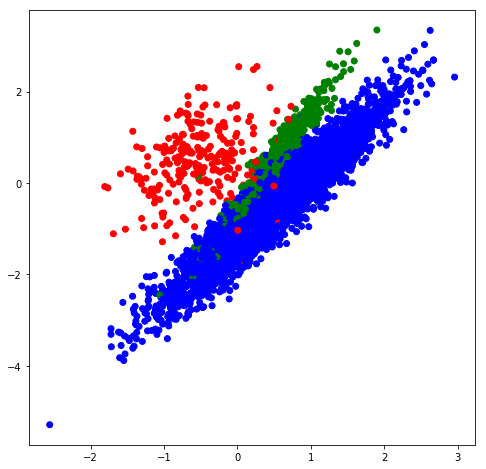

In [75]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

# 2. Make stratified train/dev dataset

# Imbalanced data handling process
- A. 전체 dataset에서 Test, Dev set으로 Stratified Resampling
- B. Dev set으로 Under Sampling OR Over Sampling
- C. Model Training
- D. Test set으로 검증하기

In [76]:
from sklearn.model_selection import train_test_split  #층화추출 안하고 뽑기 

X_dev, X_test, y_dev, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

In [77]:
Counter(y_dev), Counter(y_test)

(Counter({2: 3411, 1: 388, 0: 201}), Counter({2: 817, 0: 61, 1: 122}))

In [78]:
np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.85275, 0.097  , 0.05025])

In [79]:
np.array(list(Counter(y_test).values())) / len(y_test)  #클래스가 붕괴됨

array([0.817, 0.061, 0.122])

# A. 전체 dataset에서 Test, Dev set으로 Stratified Resampling

In [80]:
X_dev, X_test, y_dev, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y)

In [81]:
np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.0525, 0.8455, 0.102 ])

In [82]:
np.array(list(Counter(y_test).values())) / len(y_test)  #클래스가 유지되면서 sampling 가능 

array([0.846, 0.102, 0.052])

# Under Sampling

# 3. Bulid Model for dev dataset with under smapling

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN

In [84]:
Counter(y_dev)

Counter({0: 210, 2: 3382, 1: 408})

# B. Dev set으로 Under Sampling OR Over Sampling
# Uner Sampling with Random

In [85]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X_dev, y_dev)

In [86]:
Counter(y_resampled)  #undersampling 해서 210으로 맞춰버림

Counter({0: 210, 1: 210, 2: 210})

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# C. Model Training

In [89]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# D. Test set으로 검증하기

In [90]:
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))  #train set이 너무 없어서 0.882로 안 좋아졌음

Accurancy : 0.882
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        52
           1       0.50      0.71      0.59       102
           2       0.96      0.90      0.93       846

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.73      0.83      0.77      1000
weighted avg       0.90      0.88      0.89      1000



In [91]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



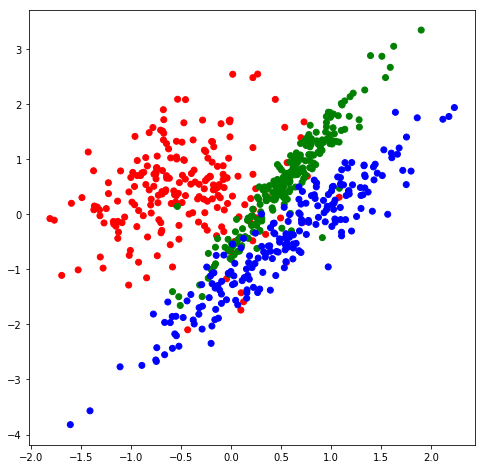

In [92]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(8,8))

plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

# B. Dev set으로 Under Sampling OR Over Sampling
# Uner Sampling with AllKNN

In [93]:
rus = AllKNN()
X_resampled, y_resampled = rus.fit_sample(X_dev, y_dev)

In [94]:
Counter(y_resampled)

Counter({0: 210, 1: 255, 2: 3208})

# C. Model Training

In [95]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# D. Test set으로 검증하기

In [96]:
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.925
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.97      0.32      0.49       102
           2       0.92      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.74      0.79      1000
weighted avg       0.93      0.93      0.91      1000



In [97]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



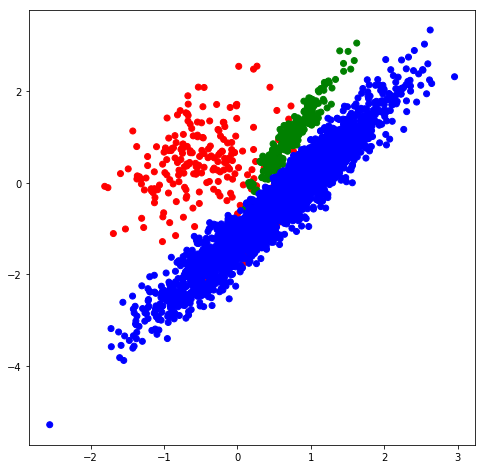

In [98]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(8,8))

plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

# ----------------------------------------------------------------------------------------------------

# OverSampling - Ranodm

In [110]:
from imblearn.over_sampling import RandomOverSampler

Counter(y_dev)

Counter({0: 210, 2: 3382, 1: 408})

In [111]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_dev, y_dev)

In [112]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.917
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        52
           1       0.65      0.82      0.73       102
           2       0.98      0.93      0.95       846

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.78      0.89      0.82      1000
weighted avg       0.93      0.92      0.92      1000



In [113]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



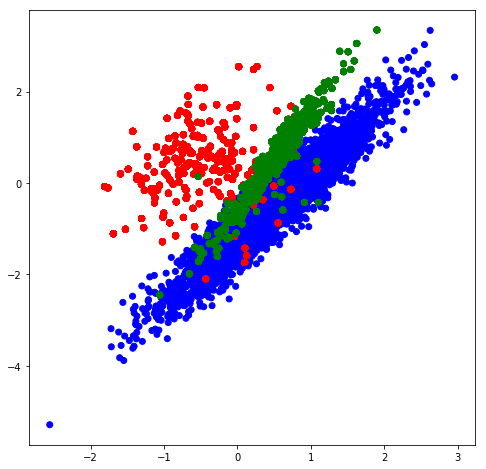

In [114]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

# Over Sampling with InstanceHardnessThreshold

In [99]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.ensemble import RandomForestClassifier

In [100]:
rus = InstanceHardnessThreshold(RandomForestClassifier())
X_resampled, y_resampled = rus.fit_sample(X_dev, y_dev)

In [66]:
Counter(y_resampled)

Counter({0: 210, 1: 244, 2: 2877})

In [67]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.924
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.97      0.32      0.49       102
           2       0.92      1.00      0.96       846

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.94      0.74      0.79      1000
weighted avg       0.93      0.92      0.91      1000



In [69]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000



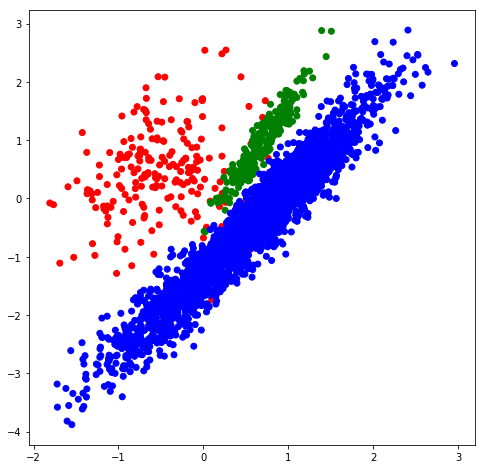

In [70]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(8,8))

plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

# Over Sampling with SMOTE

In [65]:
from imblearn.over_sampling import SMOTE

In [69]:
smothe = SMOTE()
X_resampled, y_resampled = smothe.fit_sample(X_dev, y_dev)

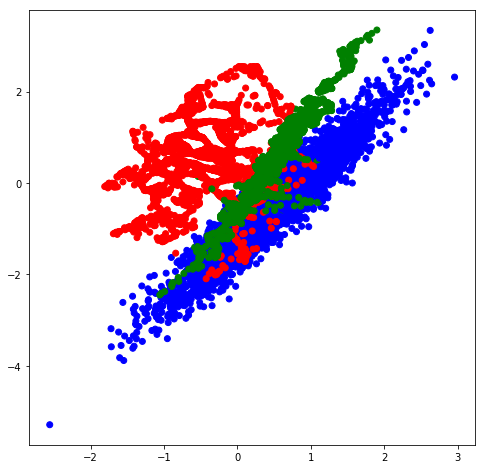

In [70]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

In [71]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.923
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        52
           1       0.68      0.85      0.76       102
           2       0.98      0.93      0.96       846

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.78      0.90      0.83      1000
weighted avg       0.94      0.92      0.93      1000



In [72]:
lr = LogisticRegression()
lr.fit(X_dev, y_dev)
y_pred = lr.predict(X_test)
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["0", "1", '2']))

Accurancy : 0.93
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.93      0.39      0.55       102
           2       0.93      1.00      0.96       846

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.76      0.81      1000
weighted avg       0.93      0.93      0.92      1000

